In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.inspection import permutation_importance
from sklearn.metrics import ConfusionMatrixDisplay

## Inspecting the Data

In [2]:
df_60s = pd.read_csv("raw_kaggle_data/dataset-of-60s.csv")
df_70s = pd.read_csv("raw_kaggle_data/dataset-of-70s.csv")
df_80s = pd.read_csv("raw_kaggle_data/dataset-of-80s.csv")
df_90s = pd.read_csv("raw_kaggle_data/dataset-of-90s.csv")
df_00s = pd.read_csv("raw_kaggle_data/dataset-of-00s.csv")
df_10s = pd.read_csv("raw_kaggle_data/dataset-of-10s.csv")

In [3]:
# Check shapes of each dataset
df_60s.shape, df_70s.shape, df_80s.shape, df_90s.shape, df_00s.shape, df_10s.shape

((8642, 19), (7766, 19), (6908, 19), (5520, 19), (5872, 19), (6398, 19))

In [4]:
# Check column names
df_60s.columns

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target'],
      dtype='object')

In [5]:
# Add decades variable
df_60s["decade"] = 1960
df_70s["decade"] = 1970
df_80s["decade"] = 1980
df_90s["decade"] = 1990
df_00s["decade"] = 2000
df_10s["decade"] = 2010

In [6]:
# Combine datasets
df = pd.concat([df_60s, df_70s, df_80s, df_90s, df_00s, df_10s]).reset_index().drop(["index"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41106 entries, 0 to 41105
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41106 non-null  object 
 1   artist            41106 non-null  object 
 2   uri               41106 non-null  object 
 3   danceability      41106 non-null  float64
 4   energy            41106 non-null  float64
 5   key               41106 non-null  int64  
 6   loudness          41106 non-null  float64
 7   mode              41106 non-null  int64  
 8   speechiness       41106 non-null  float64
 9   acousticness      41106 non-null  float64
 10  instrumentalness  41106 non-null  float64
 11  liveness          41106 non-null  float64
 12  valence           41106 non-null  float64
 13  tempo             41106 non-null  float64
 14  duration_ms       41106 non-null  int64  
 15  time_signature    41106 non-null  int64  
 16  chorus_hit        41106 non-null  float6

In [7]:
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1,1960
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0,1960
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0,1960
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0,1960
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0,1960


## EDA Visualizations

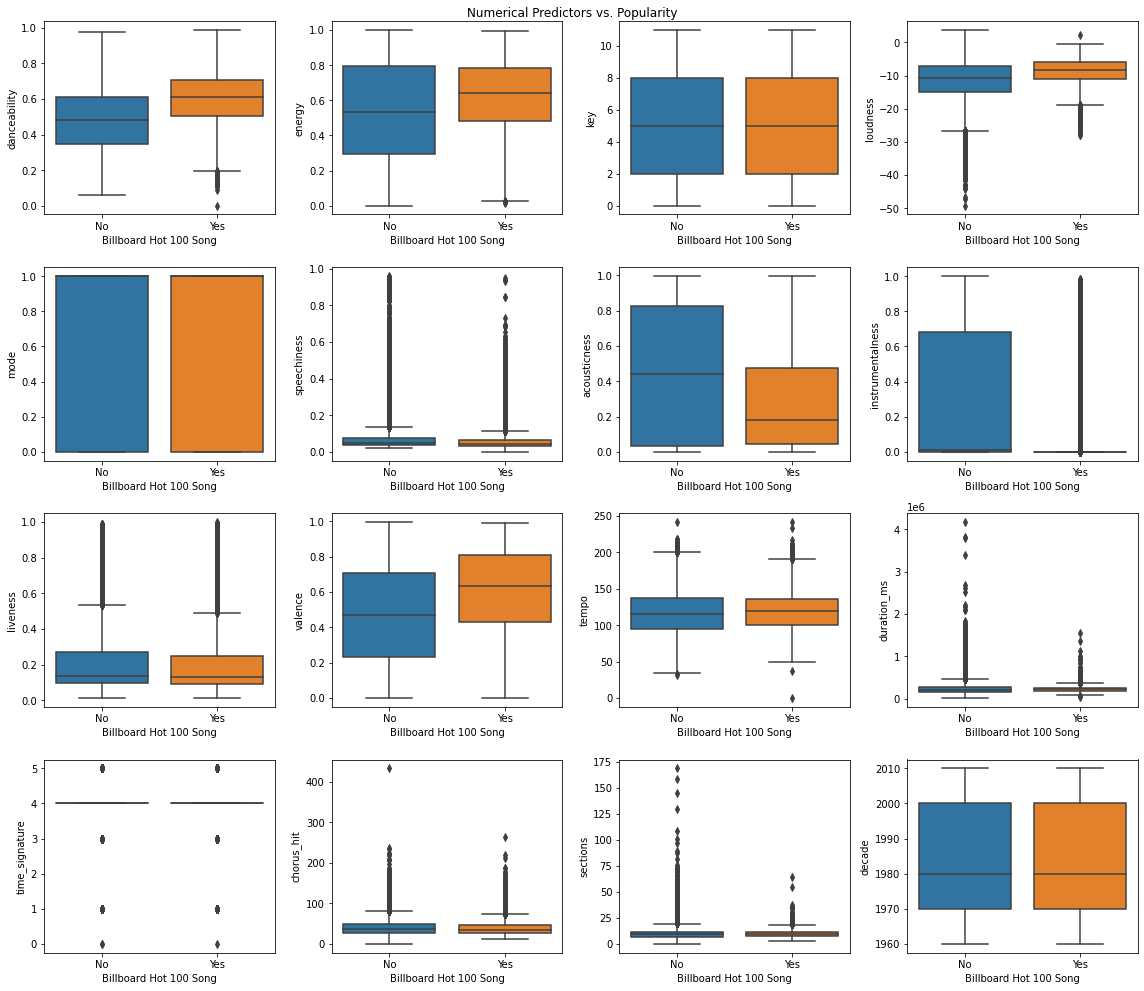

In [8]:
numeric_preds = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms", "time_signature", "chorus_hit", "sections", "decade"]

fig, axs = plt.subplots(4, 4, figsize=(16, 14))
fig.suptitle("Numerical Predictors vs. Popularity")
axs = axs.flatten()

for i, pred in enumerate(numeric_preds):
    sns.boxplot(data=df, x = "target", y = pred, ax=axs[i])
    axs[i].set_xlabel("Billboard Hot 100 Song")
    axs[i].set_xticks([0,1], labels=["No", "Yes"])

plt.tight_layout()

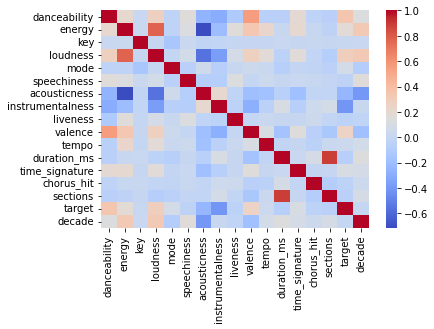

In [9]:
sns.heatmap(df.corr(), cmap=sns.color_palette("coolwarm", as_cmap=True));

In [10]:
df = pd.read_csv("spotify_combined_decades.csv")

## Naive Model

In [11]:
df = pd.read_csv("spotify_combined_decades.csv")

In [12]:
train, test = train_test_split(df, train_size=0.8, random_state=109)

X_train, y_train = train.drop('target', axis=1), train['target']
X_test, y_test = test.drop('target', axis=1), test['target']

In [13]:
train.to_csv("spotify_train.csv", index=False)

In [14]:
test.to_csv("spotify_test.csv", index=False)

In [15]:
train_prop_popular = train['target'].sum() / len(train)
test_prop_popular = test['target'].sum() / len(test)

print(f'Proportion on Billboard in Train: {train_prop_popular}')
print(f'Proportion not on Billboard in Train: {1 - train_prop_popular}')
print()
print(f'Proportion on Billboard in Test: {test_prop_popular}')
print(f'Proportion not on Billboard in Test: {1 - test_prop_popular}')

Proportion on Billboard in Train: 0.4994526213356039
Proportion not on Billboard in Train: 0.5005473786643961

Proportion on Billboard in Test: 0.5021892483580638
Proportion not on Billboard in Test: 0.4978107516419362


## Single Decision Tree

In [47]:
train = pd.read_csv("spotify_train.csv")
test = pd.read_csv("spotify_test.csv")

In [6]:
train.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
0,Dime Que,Allison,spotify:track:2hnCnKKNt16wssWn0SAD4M,0.429,0.615,0,-4.703,1,0.0317,0.216,0.0000,0.1450,0.1470,173.971,205827,4,57.87582,9,0,2000
1,JB At Home On The Piano,John Baker,spotify:track:2yBsQOXhAszEKILoUWauJR,0.258,0.207,9,-18.971,0,0.0421,0.985,0.9420,0.1760,0.1130,172.354,52227,4,17.90475,3,0,2000
2,California Soul,Gerald Wilson Orchestra,spotify:track:4SwzHlEIydxwesGMcMo4A7,0.431,0.545,2,-9.605,1,0.0265,0.354,0.0301,0.0815,0.6690,106.002,250733,4,35.80236,13,0,1960
3,"Synthi Effect (spaceship, orbit)",Deuter,spotify:track:02D7V7628IEDnnqsUOow0y,0.142,0.520,10,-16.886,1,0.0495,0.995,0.8000,0.1050,0.0173,169.209,34707,4,0.00000,2,0,1970
4,"Baby, What's Wrong",Lonnie Mack,spotify:track:2Aqmzxmue7wu0cmzZe7nda,0.358,0.694,0,-8.733,1,0.0415,0.293,0.0000,0.1520,0.8340,199.893,227693,4,29.01181,14,1,1960


In [7]:
numeric_preds = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms", "time_signature", "chorus_hit", "sections", "decade"]

In [48]:
X_train, y_train = train[numeric_preds], train["target"]
X_test, y_test = test[numeric_preds], test["target"]

In [9]:
# Find best decision tree depth with cross validation
depths = [i for i in range(1, 21)]
train_scores = []
cvmeans = []
cvstds = []

for depth in depths:
    # Fit decision tree
    tree = DecisionTreeClassifier(max_depth=depth, random_state=109).fit(X_train, y_train)
    
    # Evaluate on training set
    train_scores.append(tree.score(X_train, y_train))
    
    # Cross Validation
    cv_scores = cross_val_score(tree, X_train, y_train, cv=5)
    cvmeans.append(cv_scores.mean())
    cvstds.append(cv_scores.std())

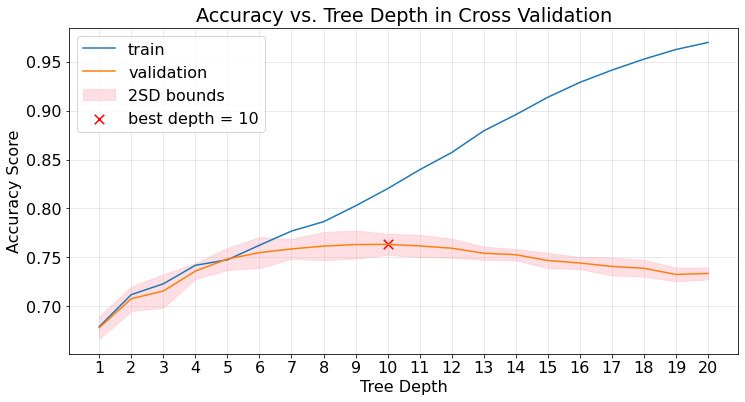

In [15]:
# Code for plot
upper_bound = [cvmeans[i] + 2*cvstds[i] for i in range(len(depths))]
lower_bound = [cvmeans[i] - 2*cvstds[i] for i in range(len(depths))]

plt.rcParams.update({'font.size': 16})
plt.subplots(figsize=(12,6))
plt.plot(depths, train_scores, label='train')
plt.plot(depths, cvmeans, label='validation')
plt.fill_between(depths, upper_bound, lower_bound, label='2SD bounds', alpha =0.5, color='pink')
plt.grid(alpha=0.3)
plt.xticks(depths)
plt.scatter(best_depth := depths[np.argmax(cvmeans)], max(cvmeans),
            marker='x', c='r', s=90, label=f'best depth = {best_depth}')
plt.legend()
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy Score")
plt.title("Accuracy vs. Tree Depth in Cross Validation");

In [11]:
tree = DecisionTreeClassifier(max_depth=best_depth, random_state=109).fit(X_train, y_train)

In [25]:
tree_train_acc = tree.score(X_train, y_train)
tree_test_acc = tree.score(X_test, y_test)
print(f'Train accuracy: {tree_train_acc}')
print(f'Test accuracy: {tree_test_acc}')

Train accuracy: 0.8201556988200949
Test accuracy: 0.7655071758696181


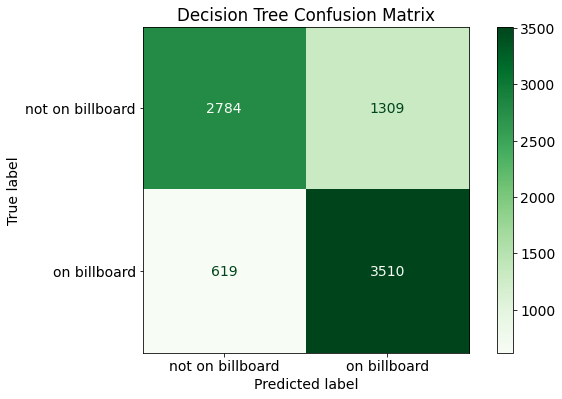

In [26]:
fig, ax = plt.subplots(figsize=(10,6))
ConfusionMatrixDisplay.from_estimator(tree, X_test, y_test, cmap=plt.cm.Greens, ax=ax)
plt.title("Decision Tree Confusion Matrix")
plt.xticks([0,1], ['not on billboard', 'on billboard'])
plt.yticks([0,1], ['not on billboard', 'on billboard']);

In [27]:
# Create a results list to display at the end
results = []
results.append({'decade': 'all', 'train_accuracy': tree_train_acc, 'test_accuracy': tree_test_acc})

## Feature Importance

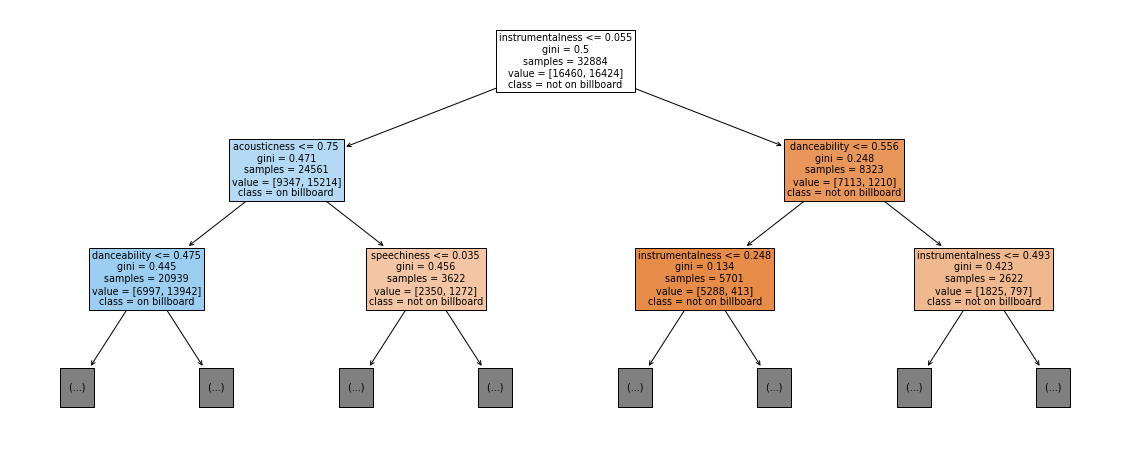

In [28]:
# Visualize Tree
plt.figure(figsize=(20, 8))
plot_tree(tree, feature_names=X_train.columns, max_depth = 2, filled=True, class_names=["not on billboard", "on billboard"]);

In [29]:
# Get feature importances
feature_importance = pd.DataFrame(zip(tree.feature_names_in_, tree.feature_importances_), columns=["feature", "gini_impurity_decrease"])
feature_importance["permutation"] = permutation_importance(tree, X_train, y_train, random_state=109)["importances_mean"]

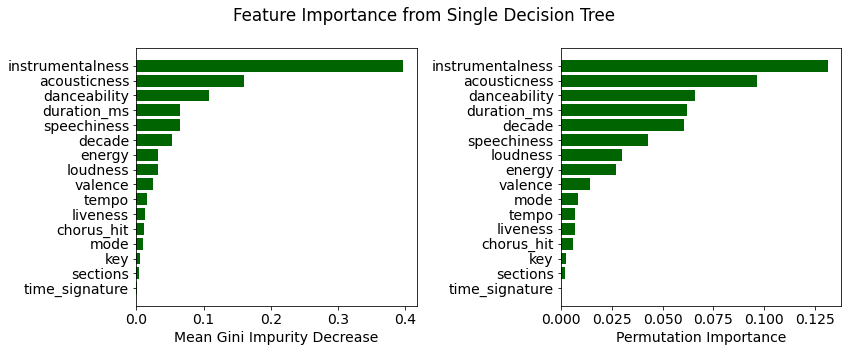

In [34]:
# Plot feature importances
plt.rcParams.update({'font.size': 14})
fig, axs = plt.subplots(1, 2, figsize=(12,5))
axs[0].barh(feature_importance.sort_values(by="gini_impurity_decrease")["feature"], feature_importance.sort_values(by="gini_impurity_decrease")["gini_impurity_decrease"], color='darkgreen')
axs[0].set_xlabel("Mean Gini Impurity Decrease")
axs[1].barh(feature_importance.sort_values(by="permutation")["feature"], feature_importance.sort_values(by="permutation")["permutation"], color='darkgreen')
axs[1].set_xlabel("Permutation Importance")
fig.suptitle("Feature Importance from Single Decision Tree")
plt.tight_layout();

In [35]:
# These 5 appear at the top for both types of feature importance, store to track them over time
top_5 = ["instrumentalness", "acousticness", "danceability", "duration_ms", "speechiness"]

## Analysis by Decade

In [36]:
decades = [1960, 1970, 1980, 1990, 2000, 2010]

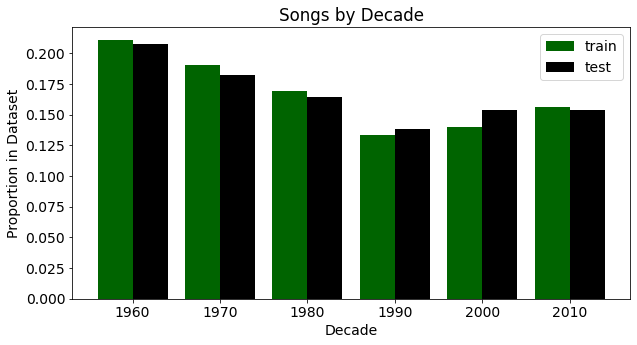

In [49]:
# Plot to see if decades are evenly distributed
width = 4

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(np.array(decades) - 2, X_train["decade"].value_counts().sort_index() / len(X_train), color="darkgreen", width=width, label="train")
ax.bar(np.array(decades) + 2, X_test["decade"].value_counts().sort_index() / len(X_test), color="black", width=width, label="test")
ax.set_xlabel("Decade")
ax.set_ylabel("Proportion in Dataset")
ax.set_title("Songs by Decade")
plt.legend();

Looks like there are differences between how many songs we have from each decade, but the proportions in train and test are pretty similar even though we did not originally stratify when splitting.

In [38]:
decade_avgs = X_train.groupby(by="decade").mean()
decade_medians = X_train.groupby(by="decade").median()

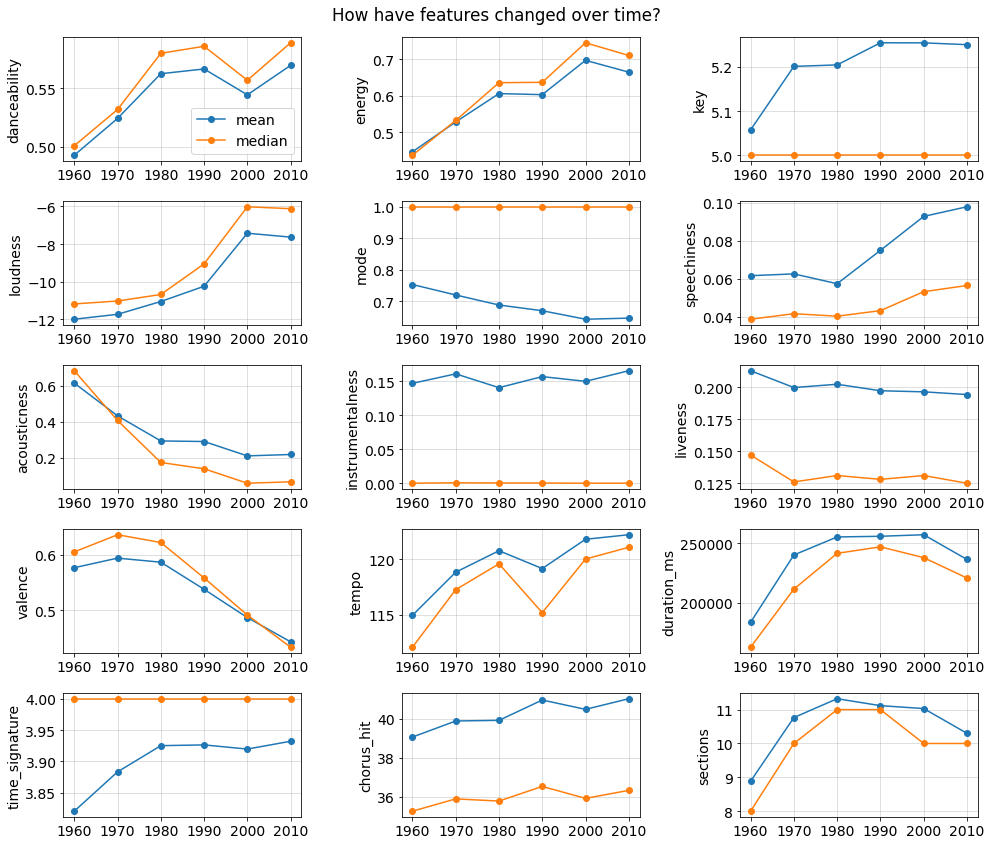

In [39]:
# Look at changes in features over time
fig, axs = plt.subplots(5, 3, figsize=(14,12))
axs = axs.flatten()
for i, column in enumerate(decade_avgs.columns):
    axs[i].plot(decade_avgs.index, decade_avgs[column], marker='o', label="mean")
    axs[i].plot(decade_medians.index, decade_medians[column], marker='o', label="median")
    axs[i].set_xticks(decades)
    axs[i].set_ylabel(column)
    axs[i].grid(alpha=0.5)
axs[0].legend()
fig.suptitle("How have features changed over time?")
plt.tight_layout()

In [40]:
# Creating sub-dataframes for each decade
decade_dfs = {}
for decade in decades:
    decade_dfs[decade] = {}
    decade_dfs[decade]["X_train"] = train[train["decade"] == decade][numeric_preds].drop("decade", axis=1)
    decade_dfs[decade]["y_train"] = train[train["decade"] == decade]["target"]
    decade_dfs[decade]["X_test"] = test[test["decade"] == decade][numeric_preds].drop("decade", axis=1)
    decade_dfs[decade]["y_test"] = test[test["decade"] == decade]["target"]

In [41]:
# Making a cross-validated tree for each decade
decade_trees = {}
for decade in decades:
    # Initializing lists
    depths = [i for i in range(1, 21)]
    train_scores = []
    cvmeans = []
    cvstds = []
    
    X_train = decade_dfs[decade]["X_train"]
    y_train = decade_dfs[decade]["y_train"]

    for depth in depths:
        # Fit decision tree
        tree = DecisionTreeClassifier(max_depth=depth, random_state=109).fit(X_train, y_train)

        # Evaluate on training set
        train_scores.append(tree.score(X_train, y_train))

        # Cross Validation
        cv_scores = cross_val_score(tree, X_train, y_train, cv=5)
        cvmeans.append(cv_scores.mean())
        cvstds.append(cv_scores.std())

    best_depth = depths[np.argmax(cvmeans)]
    final_tree = DecisionTreeClassifier(max_depth=best_depth, random_state=109).fit(X_train, y_train)
    decade_trees[decade] = final_tree
    
    tree_train_acc = final_tree.score(X_train, y_train)
    tree_test_acc = final_tree.score(decade_dfs[decade]["X_test"], decade_dfs[decade]["y_test"])
    
    results.append({'decade': decade, 'train_accuracy': tree_train_acc, 'test_accuracy': tree_test_acc})

In [42]:
# Display Accuracies of each model
pd.DataFrame(results)

,decade,train_accuracy,test_accuracy
0,all,0.820156,0.765507
1,1960,0.773501,0.751465
2,1970,0.787458,0.726484
3,1980,0.822206,0.750555
4,1990,0.838769,0.812335
5,2000,0.873915,0.814873
6,2010,0.862405,0.808208


In [65]:
# Get feature importances for each decade
importances = []
for decade in decades:
    row = {}
    for feature in top_5:
        row["decade"] = decade
        row[feature] = decade_trees[decade].feature_importances_[list(decade_trees[decade].feature_names_in_).index(feature)]
    importances.append(row)

importances = pd.DataFrame(importances)

In [66]:
importances

,decade,instrumentalness,acousticness,danceability,duration_ms,speechiness
0,1960,0.352611,0.174204,0.014126,0.172669,0.084615
1,1970,0.349112,0.190767,0.084035,0.130802,0.136613
2,1980,0.326997,0.134156,0.113797,0.172692,0.111352
3,1990,0.355583,0.171651,0.131012,0.289458,0.036329
4,2000,0.528428,0.074509,0.144982,0.109357,0.040314
5,2010,0.640194,0.037646,0.051587,0.019759,0.021978


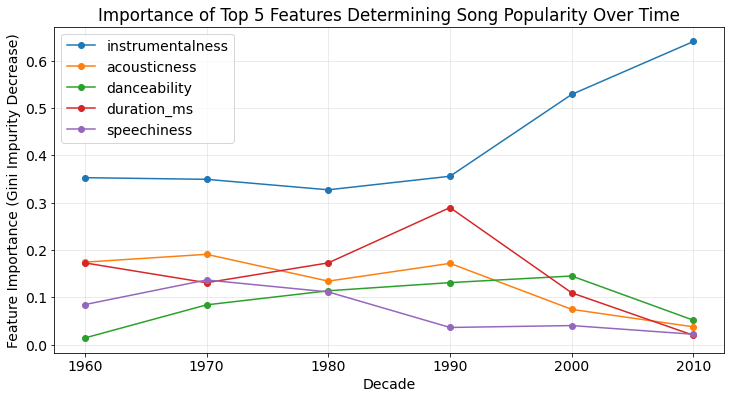

In [67]:
# Plot tracking importance of notable features over time
plt.subplots(figsize=(12,6))
for feature in top_5:
    plt.plot(importances.decade, importances[feature], marker='o', label=feature)
plt.legend()
plt.xlabel("Decade")
plt.ylabel("Feature Importance (Gini Impurity Decrease)")
plt.title("Importance of Top 5 Features Determining Song Popularity Over Time")
plt.grid(alpha=0.3);